In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
pd.set_option('display.max_rows', 80)
pd.set_option('display.width',400)
pd.set_option('display.max_columns', None)

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 9)

pd.set_option('display.float_format', '{:.2f}'.format)

#Step 1: Data Collection

In [3]:
covid=pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv',low_memory=False)

In [4]:
covid.shape # Number of rows and columns in the dataset

(1962781, 80)

In [5]:
covid.head() #Displaying top first five rows in the dataset

Date   FIPS  MMWR_week     Recip_County Recip_State  Completeness_pct  Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  Administered_Dose1_Recip_65Plus  \
0  05/10/2023  55129         19  Washburn County          WI             96.70                  11123.00                       70.80                        11097.00                                  73.90                         10863.00                                   78.50                         10368.00                                   81.30                          4749.00   
1  05/10/2023  19173         19    Taylor County          IA             97.30                   3149.00                       51.40                         3145.00                                  55.00                          3079.00                                   59.80                          2966.00                                   63.30                          1249.00   
2  05/10/2023  36059         19    Nassau County          NY             97.50                1391226.00                       95.00                      1384503.00                                  95.00                       1329779.00                                   95.00                       1232671.00                                   95.00                        313054.00   
3  05/10/2023  48281         19  Lampasas County          TX             98.90                  11678.00                       54.50                        11660.00                                  57.40                         11468.00                                   61.90                         10849.00                                   64.60                          3920.00   
4  05/10/2023  26145         19   Saginaw County          MI             94.00                 104075.00                       54.60                             NaN                                    NaN                              NaN                                     NaN                              NaN                                     NaN                              NaN   

   Administered_Dose1_Recip_65PlusPop_Pct  Series_Complete_Yes  Series_Complete_Pop_Pct  Series_Complete_5Plus  Series_Complete_5PlusPop_Pct  Series_Complete_5to17  Series_Complete_5to17Pop_Pct  Series_Complete_12Plus  Series_Complete_12PlusPop_Pct  Series_Complete_18Plus  Series_Complete_18PlusPop_Pct  Series_Complete_65Plus  Series_Complete_65PlusPop_Pct  Booster_Doses  Booster_Doses_Vax_Pct  \
0                                   95.00             10325.00                    65.70               10311.00                         68.70                 648.00                         28.80                10105.00                          73.00                 9663.00                          75.70                 4483.00                          95.00        6800.00                  65.90   
1                                   89.70              2951.00                    48.20                2949.00                         51.50                 157.00                         15.20                 2887.00                          56.00                 2792.00                          59.60                 1211.00                          87.00        1804.00                  61.10   
2                                   95.00           1179481.00                    86.90             1174924.00                         91.60              133132.00                         61.40              1127179.00                          95.00              1041792.00                          95.00               268167.00                          95.00      548555.00                  46.50   
3                                   90.70             10007.00                    46.70     

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962781 entries, 0 to 1962780
Data columns (total 80 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Date                                     object 
 1   FIPS                                     object 
 2   MMWR_week                                int64  
 3   Recip_County                             object 
 4   Recip_State                              object 
 5   Completeness_pct                         float64
 6   Administered_Dose1_Recip                 float64
 7   Administered_Dose1_Pop_Pct               float64
 8   Administered_Dose1_Recip_5Plus           float64
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64
 10  Administered_Dose1_Recip_12Plus          float64
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64
 12  Administered_Dose1_Recip_18Plus          float64
 13  Administered_Dose1_Recip_18PlusPop_Pct   float64
 14  Administered_Dose1

#Step 2: Data Cleaning

**Converting Object datatype to Datetime**

In [7]:
covid['Date']=pd.to_datetime(covid['Date'],format="%m/%d/%Y")

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962781 entries, 0 to 1962780
Data columns (total 80 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Date                                     datetime64[ns]
 1   FIPS                                     object        
 2   MMWR_week                                int64         
 3   Recip_County                             object        
 4   Recip_State                              object        
 5   Completeness_pct                         float64       
 6   Administered_Dose1_Recip                 float64       
 7   Administered_Dose1_Pop_Pct               float64       
 8   Administered_Dose1_Recip_5Plus           float64       
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64       
 10  Administered_Dose1_Recip_12Plus          float64       
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64       
 12  Administered_Dose1_Recip_18P

In [9]:
covid

Date   FIPS  MMWR_week      Recip_County Recip_State  Completeness_pct  Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  Administered_Dose1_Recip_65Plus  \
0       2023-05-10  55129         19   Washburn County          WI             96.70                  11123.00                       70.80                        11097.00                                  73.90                         10863.00                                   78.50                         10368.00                                   81.30                          4749.00   
1       2023-05-10  19173         19     Taylor County          IA             97.30                   3149.00                       51.40                         3145.00                                  55.00                          3079.00                                   59.80                          2966.00                                   63.30                          1249.00   
2       2023-05-10  36059         19     Nassau County          NY             97.50                1391226.00                       95.00                      1384503.00                                  95.00                       1329779.00                                   95.00                       1232671.00                                   95.00                        313054.00   
3       2023-05-10  48281         19   Lampasas County          TX             98.90                  11678.00                       54.50                        11660.00                                  57.40                         11468.00                                   61.90                         10849.00                                   64.60                          3920.00   
4       2023-05-10  26145         19    Saginaw County          MI             94.00                 104075.00                       54.60                             NaN                                    NaN                              NaN                                     NaN                              NaN                                     NaN                              NaN   
...            ...    ...        ...               ...         ...               ...                       ...                         ...                             ...                                    ...                              ...                                     ...                              ...                                     ...                              ...   
1962776 2020-12-13  39001         51      Adams County          OH              0.00                      0.00                        0.00                             NaN                                    NaN                             0.00                                    0.00                             0.00                                    0.00                             0.00   
1962777 2020-12-13  18061         51   Harrison County          IN              0.00                      0.00                        0.00                             NaN                                    NaN                             0.00                                    0.00                             0.00                                    0.00                             0.00   
1962778 2020-12-13  48321         51  Matagorda County          TX              0.00                      0.00                        0.00                             NaN                                    NaN                             0.00                                    0.00                             0.00                                    0.00                             0.00   
1962779 2020-12-13  54073         51  Pleasants County          WV              0.00          

In [10]:
Check_FIPS1=covid[(covid['FIPS']=='UNK') & (covid['Recip_County']!='Unknown County')]
Check_FIPS1

Empty DataFrame
Columns: [Date, FIPS, MMWR_week, Recip_County, Recip_State, Completeness_pct, Administered_Dose1_Recip, Administered_Dose1_Pop_Pct, Administered_Dose1_Recip_5Plus, Administered_Dose1_Recip_5PlusPop_Pct, Administered_Dose1_Recip_12Plus, Administered_Dose1_Recip_12PlusPop_Pct, Administered_Dose1_Recip_18Plus, Administered_Dose1_Recip_18PlusPop_Pct, Administered_Dose1_Recip_65Plus, Administered_Dose1_Recip_65PlusPop_Pct, Series_Complete_Yes, Series_Complete_Pop_Pct, Series_Complete_5Plus, Series_Complete_5PlusPop_Pct, Series_Complete_5to17, Series_Complete_5to17Pop_Pct, Series_Complete_12Plus, Series_Complete_12PlusPop_Pct, Series_Complete_18Plus, Series_Complete_18PlusPop_Pct, Series_Complete_65Plus, Series_Complete_65PlusPop_Pct, Booster_Doses, Booster_Doses_Vax_Pct, Booster_Doses_5Plus, Booster_Doses_5Plus_Vax_Pct, Booster_Doses_12Plus, Booster_Doses_12Plus_Vax_Pct, Booster_Doses_18Plus, Booster_Doses_18Plus_Vax_Pct, Booster_Doses_50Plus, Booster_Doses_50Plus_Vax_Pct, Booster_Doses_65Plus, Booster_Doses_65Plus_Vax_Pct, Second_Booster_50Plus, Second_Booster_50Plus_Vax_Pct, Second_Booster_65Plus, Second_Booster_65Plus_Vax_Pct, SVI_CTGY, Series_Complete_Pop_Pct_SVI, Series_Complete_5PlusPop_Pct_SVI, Series_Complete_5to17Pop_Pct_SVI, Series_Complete_12PlusPop_Pct_SVI, Series_Complete_18PlusPop_Pct_SVI, Series_Complete_65PlusPop_Pct_SVI, Metro_status, Series_Complete_Pop_Pct_UR_Equity, Series_Complete_5PlusPop_Pct_UR_Equity, Series_Complete_5to17Pop_Pct_UR_Equity, Series_Complete_12PlusPop_Pct_UR_Equity, Series_Complete_18PlusPop_Pct_UR_Equity, Series_Complete_65PlusPop_Pct_UR_Equity, Booster_Doses_Vax_Pct_SVI, Booster_Doses_12PlusVax_Pct_SVI, Booster_Doses_18PlusVax_Pct_SVI, Booster_Doses_65PlusVax_Pct_SVI, Booster_Doses_Vax_Pct_UR_Equity, Booster_Doses_12PlusVax_Pct_UR_Equity, Booster_Doses_18PlusVax_Pct_UR_Equity, Booster_Doses_65PlusVax_Pct_UR_Equity, Census2019, Census2019_5PlusPop, Census2019_5to17Pop, Census2019_12PlusPop, Census2019_18PlusPop, Census2019_65PlusPop, Bivalent_Booster_5Plus, Bivalent_Booster_5Plus_Pop_Pct, Bivalent_Booster_12Plus, Bivalent_Booster_12Plus_Pop_Pct, Bivalent_Booster_18Plus, Bivalent_Booster_18Plus_Pop_Pct, Bivalent_Booster_65Plus, Bivalent_Booster_65Plus_Pop_Pct]
Index: []

In [11]:
Check_FIPS=covid[covid['FIPS']=='UNK']
Check_FIPS

Date FIPS  MMWR_week    Recip_County Recip_State  Completeness_pct  Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  Administered_Dose1_Recip_65Plus  \
28      2023-05-10  UNK         19  Unknown County          NM             97.00                  78418.00                         NaN                        78222.00                                    NaN                         76182.00                                     NaN                         73791.00                                     NaN                         18124.00   
106     2023-05-10  UNK         19  Unknown County          WI             96.70                 180099.00                         NaN                       179012.00                                    NaN                        175553.00                                     NaN                        168707.00                                     NaN                         40543.00   
205     2023-05-10  UNK         19  Unknown County          SD             96.70                  28397.00                         NaN                        28326.00                                    NaN                         27957.00                                     NaN                         27150.00                                     NaN                          9554.00   
222     2023-05-10  UNK         19  Unknown County          MT             95.90                  38949.00                         NaN                        38484.00                                    NaN                         37938.00                                     NaN                         37021.00                                     NaN                         10620.00   
296     2023-05-10  UNK         19  Unknown County          LA             96.90                  91942.00                         NaN                             NaN                                    NaN                              NaN                                     NaN                              NaN                                     NaN                              NaN   
...            ...  ...        ...             ...         ...               ...                       ...                         ...                             ...                                    ...                              ...                                     ...                              ...                                     ...                              ...   
1955427 2020-12-15  UNK         51  Unknown County          MN              0.00                     19.00                        0.00                             NaN                                    NaN                            19.00                                    0.00                            19.00                                    0.00                             1.00   
1955949 2020-12-15  UNK         51  Unknown County          VT              0.00                      1.00                        0.00                             NaN                                    NaN                             1.00                                    0.00                             1.00                                    0.00                             0.00   
1955994 2020-12-15  UNK         51  Unknown County          IL              0.00                      1.00                        0.00                             NaN                                    NaN                             1.00                                    0.00                             1.00                                    0.00                             0.00   
1956043 2020-12-15  UNK         51  Unknown County          PA              0.00                      1.00                        0.00

In [12]:
covid[['FIPS','Recip_County']].value_counts()

FIPS   Recip_County     
UNK    Unknown County       34829
40047  Garfield County        598
40027  Cleveland County       598
40029  Coal County            598
40031  Comanche County        598
                            ...  
21171  Monroe County          598
21173  Montgomery County      598
21175  Morgan County          598
21177  Muhlenberg County      598
30029  Flathead County        598
Name: count, Length: 3225, dtype: int64

In [13]:
covid['FIPS'] = covid['FIPS'].astype('object')
covid['FIPS'] = covid['FIPS'].apply(lambda x: str(x) if isinstance(x, int) else x)
covid['FIPS'] = covid['FIPS'].astype('str')


def add_zero_prefix(value):
    if len(value) == 4:
        return '0' + value
    else:
        return value

# Apply the function to the 'Column1'
covid['FIPS'] = covid['FIPS'].apply(add_zero_prefix)

print("\nDataFrame with '0' added to values of length 4:")



DataFrame with '0' added to values of length 4:


In [14]:
covid['FIPS'].value_counts()

FIPS
UNK      34829
55129      598
55063      598
22035      598
01089      598
         ...  
09011      598
18149      598
32003      598
28095      598
12113      598
Name: count, Length: 3225, dtype: int64

**Missing Values in each Attribute/Feature**

In [15]:
cov_missing_values=covid.isnull().sum()
print(cov_missing_values)

Date                                             0
FIPS                                             0
MMWR_week                                        0
Recip_County                                     0
Recip_State                                     81
Completeness_pct                              5673
Administered_Dose1_Recip                     58287
Administered_Dose1_Pop_Pct                   24085
Administered_Dose1_Recip_5Plus             1215611
Administered_Dose1_Recip_5PlusPop_Pct      1210831
Administered_Dose1_Recip_12Plus             117580
Administered_Dose1_Recip_12PlusPop_Pct       48598
Administered_Dose1_Recip_18Plus              99383
Administered_Dose1_Recip_18PlusPop_Pct       30202
Administered_Dose1_Recip_65Plus              99278
Administered_Dose1_Recip_65PlusPop_Pct       30097
Series_Complete_Yes                           6266
Series_Complete_Pop_Pct                      14887
Series_Complete_5Plus                      1186856
Series_Complete_5PlusPop_Pct   

**Percentage of Missing Values in each Attribute/Feature**

In [16]:
cov_missing_values/covid.shape[0] * 100

Date                                       0.00
FIPS                                       0.00
MMWR_week                                  0.00
Recip_County                               0.00
Recip_State                                0.00
Completeness_pct                           0.29
Administered_Dose1_Recip                   2.97
Administered_Dose1_Pop_Pct                 1.23
Administered_Dose1_Recip_5Plus            61.93
Administered_Dose1_Recip_5PlusPop_Pct     61.69
Administered_Dose1_Recip_12Plus            5.99
Administered_Dose1_Recip_12PlusPop_Pct     2.48
Administered_Dose1_Recip_18Plus            5.06
Administered_Dose1_Recip_18PlusPop_Pct     1.54
Administered_Dose1_Recip_65Plus            5.06
Administered_Dose1_Recip_65PlusPop_Pct     1.53
Series_Complete_Yes                        0.32
Series_Complete_Pop_Pct                    0.76
Series_Complete_5Plus                     60.47
Series_Complete_5PlusPop_Pct              60.91
Series_Complete_5to17                   

**Dropping unwanted rows/records [row with little to no value because of null values]**

In [17]:
covid[covid['FIPS']=='UNK'].isnull().sum()

Date                                           0
FIPS                                           0
MMWR_week                                      0
Recip_County                                   0
Recip_State                                   81
Completeness_pct                            1055
Administered_Dose1_Recip                    1408
Administered_Dose1_Pop_Pct                  8475
Administered_Dose1_Recip_5Plus             21493
Administered_Dose1_Recip_5PlusPop_Pct      29193
Administered_Dose1_Recip_12Plus             3382
Administered_Dose1_Recip_12PlusPop_Pct      8880
Administered_Dose1_Recip_18Plus             3176
Administered_Dose1_Recip_18PlusPop_Pct      8475
Administered_Dose1_Recip_65Plus             3176
Administered_Dose1_Recip_65PlusPop_Pct      8475
Series_Complete_Yes                          274
Series_Complete_Pop_Pct                     8475
Series_Complete_5Plus                      20992
Series_Complete_5PlusPop_Pct               29193
Series_Complete_5to1

In [18]:
covid[covid['Recip_County']=='Unknown County'].isnull().sum()

Date                                           0
FIPS                                           0
MMWR_week                                      0
Recip_County                                   0
Recip_State                                   81
Completeness_pct                            1055
Administered_Dose1_Recip                    1408
Administered_Dose1_Pop_Pct                  8475
Administered_Dose1_Recip_5Plus             21493
Administered_Dose1_Recip_5PlusPop_Pct      29193
Administered_Dose1_Recip_12Plus             3382
Administered_Dose1_Recip_12PlusPop_Pct      8880
Administered_Dose1_Recip_18Plus             3176
Administered_Dose1_Recip_18PlusPop_Pct      8475
Administered_Dose1_Recip_65Plus             3176
Administered_Dose1_Recip_65PlusPop_Pct      8475
Series_Complete_Yes                          274
Series_Complete_Pop_Pct                     8475
Series_Complete_5Plus                      20992
Series_Complete_5PlusPop_Pct               29193
Series_Complete_5to1

Dropping Rows with FIPS as UNK (null values)

In [19]:
covid=covid[covid['FIPS']!='UNK']

In [20]:
Check_FIPS1=covid[covid['FIPS']=='UNK']
Check_FIPS1

Empty DataFrame
Columns: [Date, FIPS, MMWR_week, Recip_County, Recip_State, Completeness_pct, Administered_Dose1_Recip, Administered_Dose1_Pop_Pct, Administered_Dose1_Recip_5Plus, Administered_Dose1_Recip_5PlusPop_Pct, Administered_Dose1_Recip_12Plus, Administered_Dose1_Recip_12PlusPop_Pct, Administered_Dose1_Recip_18Plus, Administered_Dose1_Recip_18PlusPop_Pct, Administered_Dose1_Recip_65Plus, Administered_Dose1_Recip_65PlusPop_Pct, Series_Complete_Yes, Series_Complete_Pop_Pct, Series_Complete_5Plus, Series_Complete_5PlusPop_Pct, Series_Complete_5to17, Series_Complete_5to17Pop_Pct, Series_Complete_12Plus, Series_Complete_12PlusPop_Pct, Series_Complete_18Plus, Series_Complete_18PlusPop_Pct, Series_Complete_65Plus, Series_Complete_65PlusPop_Pct, Booster_Doses, Booster_Doses_Vax_Pct, Booster_Doses_5Plus, Booster_Doses_5Plus_Vax_Pct, Booster_Doses_12Plus, Booster_Doses_12Plus_Vax_Pct, Booster_Doses_18Plus, Booster_Doses_18Plus_Vax_Pct, Booster_Doses_50Plus, Booster_Doses_50Plus_Vax_Pct, Booster_Doses_65Plus, Booster_Doses_65Plus_Vax_Pct, Second_Booster_50Plus, Second_Booster_50Plus_Vax_Pct, Second_Booster_65Plus, Second_Booster_65Plus_Vax_Pct, SVI_CTGY, Series_Complete_Pop_Pct_SVI, Series_Complete_5PlusPop_Pct_SVI, Series_Complete_5to17Pop_Pct_SVI, Series_Complete_12PlusPop_Pct_SVI, Series_Complete_18PlusPop_Pct_SVI, Series_Complete_65PlusPop_Pct_SVI, Metro_status, Series_Complete_Pop_Pct_UR_Equity, Series_Complete_5PlusPop_Pct_UR_Equity, Series_Complete_5to17Pop_Pct_UR_Equity, Series_Complete_12PlusPop_Pct_UR_Equity, Series_Complete_18PlusPop_Pct_UR_Equity, Series_Complete_65PlusPop_Pct_UR_Equity, Booster_Doses_Vax_Pct_SVI, Booster_Doses_12PlusVax_Pct_SVI, Booster_Doses_18PlusVax_Pct_SVI, Booster_Doses_65PlusVax_Pct_SVI, Booster_Doses_Vax_Pct_UR_Equity, Booster_Doses_12PlusVax_Pct_UR_Equity, Booster_Doses_18PlusVax_Pct_UR_Equity, Booster_Doses_65PlusVax_Pct_UR_Equity, Census2019, Census2019_5PlusPop, Census2019_5to17Pop, Census2019_12PlusPop, Census2019_18PlusPop, Census2019_65PlusPop, Bivalent_Booster_5Plus, Bivalent_Booster_5Plus_Pop_Pct, Bivalent_Booster_12Plus, Bivalent_Booster_12Plus_Pop_Pct, Bivalent_Booster_18Plus, Bivalent_Booster_18Plus_Pop_Pct, Bivalent_Booster_65Plus, Bivalent_Booster_65Plus_Pop_Pct]
Index: []

In [21]:
covid.shape

(1927952, 80)

In [22]:
covid.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,       8,       9,
       ...
       1962771, 1962772, 1962773, 1962774, 1962775, 1962776, 1962777, 1962778, 1962779, 1962780], dtype='int64', length=1927952)

In [23]:
# 1927952 entries, 0 to 1962780
# After dropping the rows with unkown counties in values the no of records are 1927952
# but the indexing is beyond 1927952
# To address this lets reindex the dataframe

In [24]:
covid.reset_index(drop=True, inplace=True)

In [25]:
covid.index

RangeIndex(start=0, stop=1927952, step=1)

In [26]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927952 entries, 0 to 1927951
Data columns (total 80 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Date                                     datetime64[ns]
 1   FIPS                                     object        
 2   MMWR_week                                int64         
 3   Recip_County                             object        
 4   Recip_State                              object        
 5   Completeness_pct                         float64       
 6   Administered_Dose1_Recip                 float64       
 7   Administered_Dose1_Pop_Pct               float64       
 8   Administered_Dose1_Recip_5Plus           float64       
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64       
 10  Administered_Dose1_Recip_12Plus          float64       
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64       
 12  Administered_Dose1_Recip_18P

**Dividing Dataset into Categorical and Numerical Datasets for Basic analysis**

In [27]:
covid_categorical=covid.loc[:,['FIPS','Recip_County','Recip_State','Metro_status','SVI_CTGY']]

In [28]:
covid_categorical.head()

FIPS     Recip_County Recip_State Metro_status SVI_CTGY
0  55129  Washburn County          WI    Non-metro        A
1  19173    Taylor County          IA    Non-metro        A
2  36059    Nassau County          NY        Metro        B
3  48281  Lampasas County          TX        Metro        C
4  26145   Saginaw County          MI        Metro        C

In [29]:
unique_values=covid_categorical.nunique()

In [30]:
unique_values

FIPS            3224
Recip_County    1959
Recip_State       54
Metro_status       2
SVI_CTGY           4
dtype: int64

In [31]:
sorted_states = covid_categorical.loc[:, ["Recip_State", "Recip_County", "Metro_status"]].sort_values(by=["Recip_State", "Recip_County"])
print(sorted_states)

        Recip_State            Recip_County Metro_status
1167             AK  Aleutians East Borough    Non-metro
6335             AK  Aleutians East Borough    Non-metro
9082             AK  Aleutians East Borough    Non-metro
12895            AK  Aleutians East Borough    Non-metro
15098            AK  Aleutians East Borough    Non-metro
...             ...                     ...          ...
1914913          WY           Weston County    Non-metro
1917587          WY           Weston County    Non-metro
1919688          WY           Weston County    Non-metro
1921828          WY           Weston County    Non-metro
1926510          WY           Weston County    Non-metro

[1927952 rows x 3 columns]


In [32]:
covid_categorical['Recip_State'].unique()

array(['WI', 'IA', 'NY', 'TX', 'MI', 'GA', 'FL', 'IL', 'TN', 'VT', 'LA',
       'MN', 'IN', 'MO', 'NE', 'VA', 'CO', 'KY', 'WA', 'OK', 'AR', 'MS',
       'PR', 'OH', 'PA', 'WV', 'UT', 'KS', 'NM', 'MT', 'NC', 'CA', 'SC',
       'MA', 'ND', 'NJ', 'AK', 'OR', 'AL', 'SD', 'WY', 'MD', 'ID', 'CT',
       'NV', 'RI', 'ME', 'NH', 'VI', 'AZ', 'DE', 'HI', 'GU', 'DC'],
      dtype=object)

In [33]:
covid_categorical['Recip_State'].value_counts().to_frame()

count
Recip_State        
TX           151892
GA            95082
VA            79534
KY            71760
MO            68770
KS            62790
IL            60996
NC            59800
IA            59202
TN            56810
NE            55614
IN            55016
OH            52624
MN            52026
MI            49634
MS            49036
PR            46644
OK            46046
AR            44850
WI            43056
PA            40066
FL            40066
AL            40066
SD            39468
LA            38272
CO            38272
NY            37076
CA            34684
MT            33488
WV            32890
ND            31694
SC            27508
ID            26312
WA            23322
OR            21528
NM            19734
AK            17342
UT            17342
MD            14352
WY            13754
NJ            12558
NV            10166
ME             9568
AZ             8970
VT             8372
MA             8372
NH             5980
CT             4784
RI             2990
HI             2990
VI             1794
DE             1794
GU              598
DC              598

In [34]:
covid_categorical['SVI_CTGY'].value_counts().to_frame()

count
SVI_CTGY        
A         481967
D         481411
B         480813
C         480792

In [35]:
covid_categorical['Metro_status'].value_counts().to_frame()

count
Metro_status         
Non-metro     1186432
Metro          738530

In [36]:
covid_numerical=covid.drop(['FIPS','Recip_County','Recip_State','Metro_status','SVI_CTGY'],axis=1)

In [37]:
covid_numerical.head()

Date  MMWR_week  Completeness_pct  Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  \
0 2023-05-10         19             96.70                  11123.00                       70.80                        11097.00                                  73.90                         10863.00                                   78.50                         10368.00                                   81.30                          4749.00                                   95.00   
1 2023-05-10         19             97.30                   3149.00                       51.40                         3145.00                                  55.00                          3079.00                                   59.80                          2966.00                                   63.30                          1249.00                                   89.70   
2 2023-05-10         19             97.50                1391226.00                       95.00                      1384503.00                                  95.00                       1329779.00                                   95.00                       1232671.00                                   95.00                        313054.00                                   95.00   
3 2023-05-10         19             98.90                  11678.00                       54.50                        11660.00                                  57.40                         11468.00                                   61.90                         10849.00                                   64.60                          3920.00                                   90.70   
4 2023-05-10         19             94.00                 104075.00                       54.60                             NaN                                    NaN                              NaN                                     NaN                              NaN                                     NaN                              NaN                                     NaN   

   Series_Complete_Yes  Series_Complete_Pop_Pct  Series_Complete_5Plus  Series_Complete_5PlusPop_Pct  Series_Complete_5to17  Series_Complete_5to17Pop_Pct  Series_Complete_12Plus  Series_Complete_12PlusPop_Pct  Series_Complete_18Plus  Series_Complete_18PlusPop_Pct  Series_Complete_65Plus  Series_Complete_65PlusPop_Pct  Booster_Doses  Booster_Doses_Vax_Pct  Booster_Doses_5Plus  \
0             10325.00                    65.70               10311.00                         68.70                 648.00                         28.80                10105.00                          73.00                 9663.00                          75.70                 4483.00                          95.00        6800.00                  65.90              6800.00   
1              2951.00                    48.20                2949.00                         51.50                 157.00                         15.20                 2887.00                          56.00                 2792.00                          59.60                 1211.00                          87.00        1804.00                  61.10              1804.00   
2           1179481.00                    86.90             1174924.00                         91.60              133132.00                         61.40              1127179.00                          95.00              1041792.00                          95.00               268167.00                          95.00      548555.00                  46.50            548367.00   
3             10007.00                    46.70                9999.00                         49.20                 669.00                         1

In [38]:
unique_values_numeric=covid_numerical.nunique()

In [39]:
unique_values_numeric

Date                                          598
MMWR_week                                      53
Completeness_pct                              593
Administered_Dose1_Recip                   241466
Administered_Dose1_Pop_Pct                   1001
Administered_Dose1_Recip_5Plus             172319
Administered_Dose1_Recip_5PlusPop_Pct         881
Administered_Dose1_Recip_12Plus            237408
Administered_Dose1_Recip_12PlusPop_Pct       1001
Administered_Dose1_Recip_18Plus            231733
Administered_Dose1_Recip_18PlusPop_Pct       1001
Administered_Dose1_Recip_65Plus            122390
Administered_Dose1_Recip_65PlusPop_Pct       1001
Series_Complete_Yes                        222804
Series_Complete_Pop_Pct                       990
Series_Complete_5Plus                      161013
Series_Complete_5PlusPop_Pct                  884
Series_Complete_5to17                       41909
Series_Complete_5to17Pop_Pct                  926
Series_Complete_12Plus                     220791


Data Visualization

**Representing Metro_Status Column**

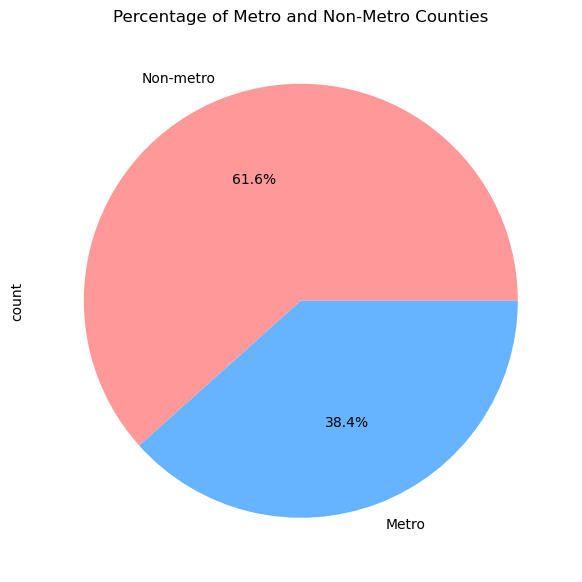

In [40]:
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(7, 8))
covid_categorical.iloc[:,3].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=colors)
plt.title("Percentage of Metro and Non-Metro Counties")
plt.xticks(rotation=360)
plt.show();

**Representing Recip_State Column**

In [41]:
import plotly.express as px

county_counts = sorted_states.groupby('Recip_State')['Recip_County'].nunique()

fig = px.bar(county_counts, x=county_counts.index, y=county_counts.values, 
             labels={'x': 'State', 'y': 'Number of Counties'}, 
             title='Number of Counties for each State')
fig.update_layout(xaxis_tickangle=90)
fig.update_layout(title_x=0.5)
fig.show()


**Representing Metro_Status Column**

In [42]:
import pandas as pd
import plotly.express as px

# Counting unique counties for each combination of state and metro status
unique_county_data = covid_categorical.groupby(['Recip_State', 'Metro_status'])['Recip_County'].nunique().reset_index(name='Unique_Counties')


fig = px.bar(unique_county_data, x='Recip_State', y='Unique_Counties', color='Metro_status', barmode='group',
             labels={'Recip_State': 'State', 'Unique_Counties': 'Unique Counties'},
             title='Count of Counties by Metro Status for Each State')

fig.update_traces(hovertemplate='<b>%{x}</b> <br>%{y} Unique Counties<br>')

fig.update_layout(title_x=0.5)

fig.show()


**Visualizing the percentage of completeness of Vaccination Rate Over the Years.**

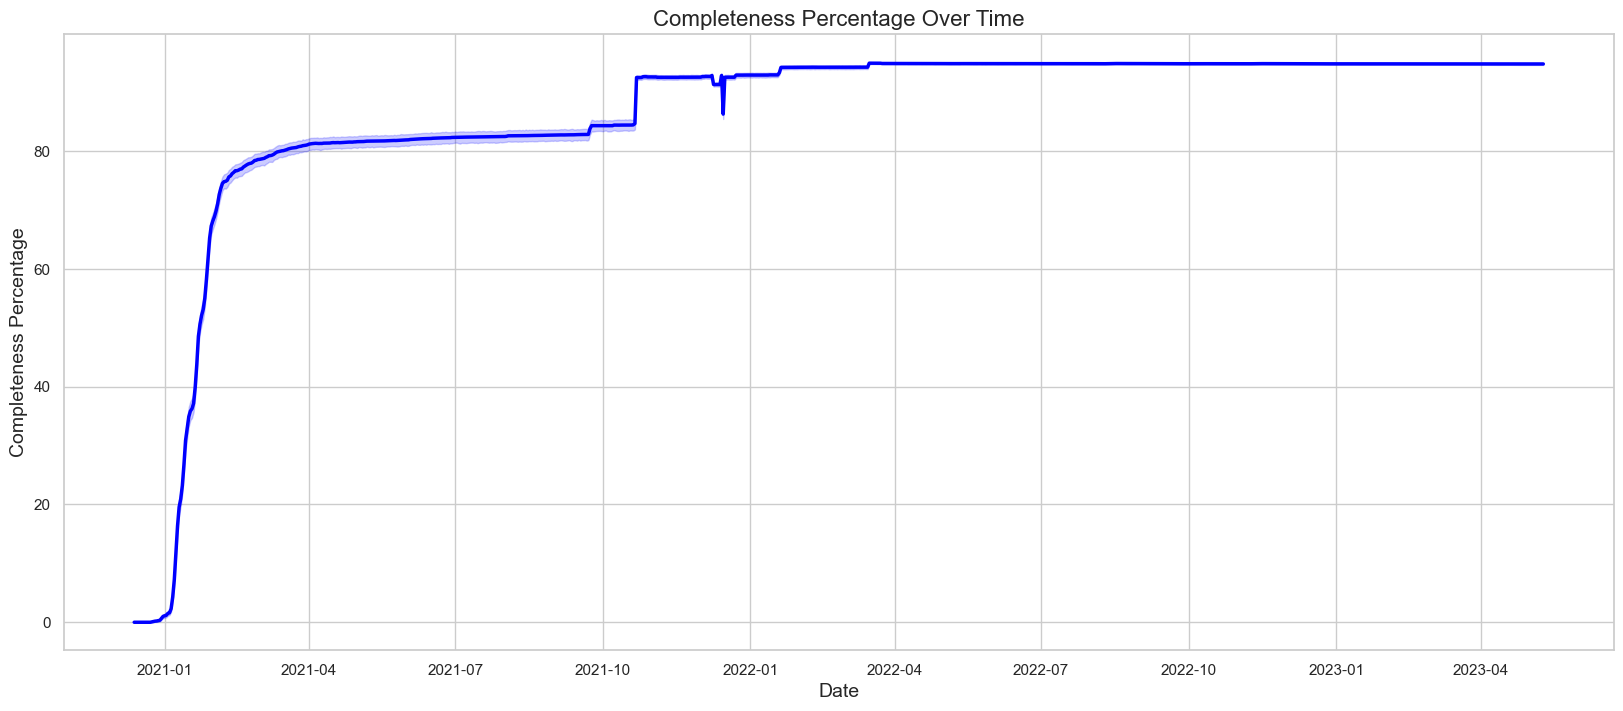

In [90]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,8))
sns.lineplot(x=covid_numerical['Date'], y=covid_numerical['Completeness_pct'], color='blue', linewidth=2.5)
plt.title('Completeness Percentage Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Completeness Percentage', fontsize=14)
plt.grid(True)
plt.show()

**Visualizing the percentage of Series completeness of Vaccination Rate Over the Years.**

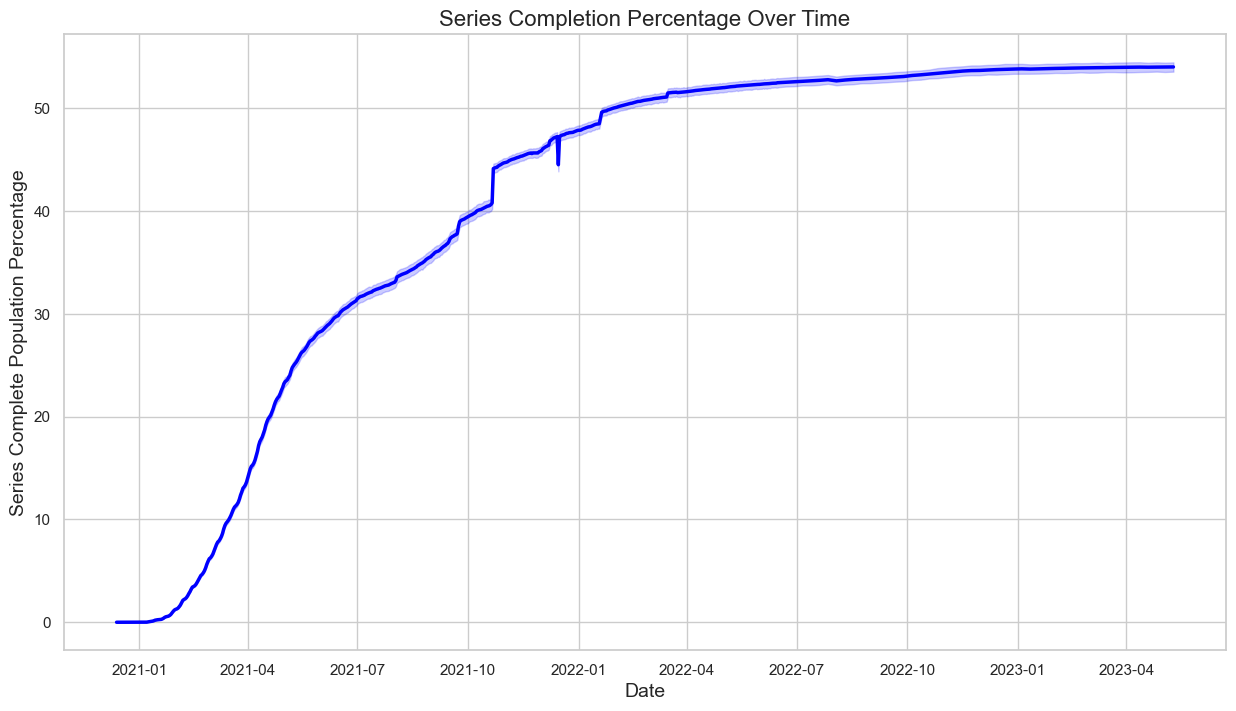

In [44]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.lineplot(x=covid_numerical['Date'], y=covid_numerical['Series_Complete_Pop_Pct'], color='blue', linewidth=2.5)
plt.title('Series Completion Percentage Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Series Complete Population Percentage', fontsize=14)
plt.grid(True)
plt.show()

**Average Vaccination Coverage**

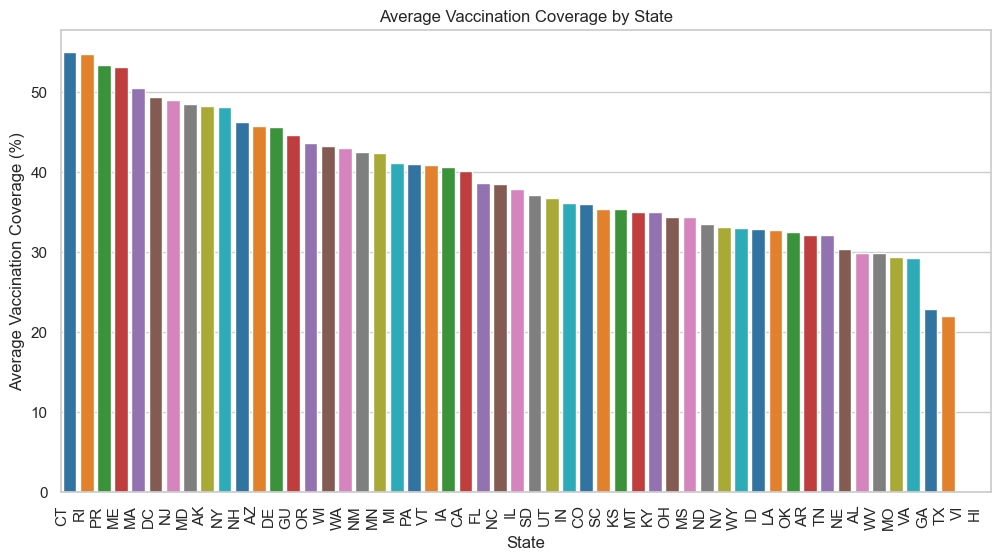

In [45]:
state_coverage = covid.groupby('Recip_State')['Series_Complete_Pop_Pct'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.barplot(x=state_coverage.index, y=state_coverage.values, palette=custom_colors)
plt.title('Average Vaccination Coverage by State')
plt.xlabel('State')
plt.ylabel('Average Vaccination Coverage (%)')
plt.xticks(rotation=90, ha='right')
plt.show()

**Visualizing the Data by Category Wise**

In [ ]:
age_group_columns = ['Series_Complete_5PlusPop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct', 'Series_Complete_65PlusPop_Pct']
age_group_data = covid[age_group_columns]

plt.figure(figsize=(12, 8))
sns.violinplot(data=age_group_data, palette='Set3')
plt.title('Vaccination Coverage Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Vaccination Coverage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

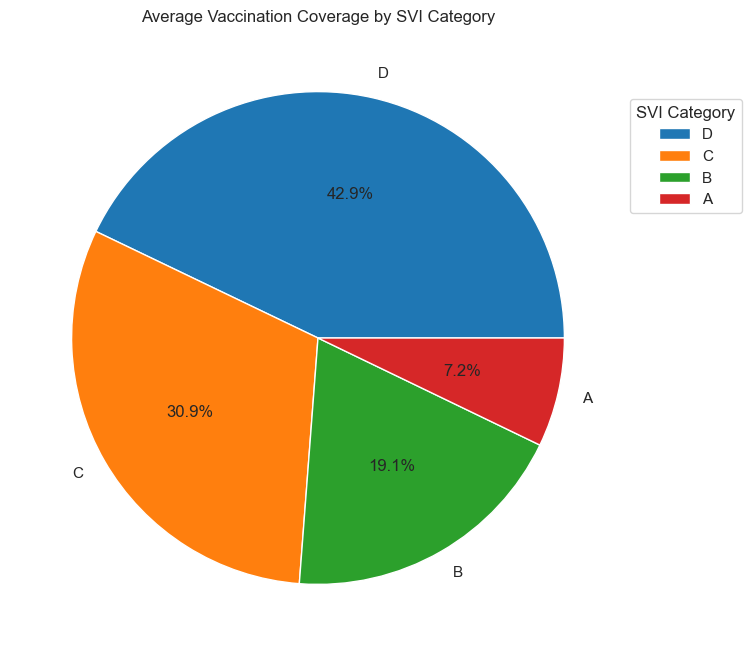

In [47]:
import matplotlib.pyplot as plt

svu_categories_pie = covid.groupby('SVI_CTGY')['Series_Complete_Pop_Pct_SVI'].mean().sort_values(ascending=False)

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(8, 8))
plt.pie(svu_categories_pie.values, labels=svu_categories_pie.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Average Vaccination Coverage by SVI Category')
plt.legend(svu_categories_pie.index, title='SVI Category', loc='upper right', bbox_to_anchor=(1.2, 0.9))
plt.show()



In [48]:
#svu_categories = covid.groupby('SVI_CTGY')['Series_Complete_Pop_Pct_SVI'].mean().sort_values(ascending=False)

#plt.figure(figsize=(10, 6))
#sns.barplot(x=svu_categories.index, y=svu_categories.values, palette='viridis')
#plt.title('Average Vaccination Coverage by SVI Category')
#plt.xlabel('SVI Category')
#plt.ylabel('Average Vaccination Coverage (%)')
#plt.xticks(rotation=45, ha='right')
#plt.show()

In [49]:
grouped_covid = covid.groupby(['FIPS','Recip_County'],dropna=True).agg({'Series_Complete_Pop_Pct': 'mean', 'Completeness_pct': 'mean'})
grouped_covid.reset_index(inplace=True)

In [50]:
temp_df=covid[["Metro_status","Series_Complete_Pop_Pct"]]
temp_df=temp_df.dropna()

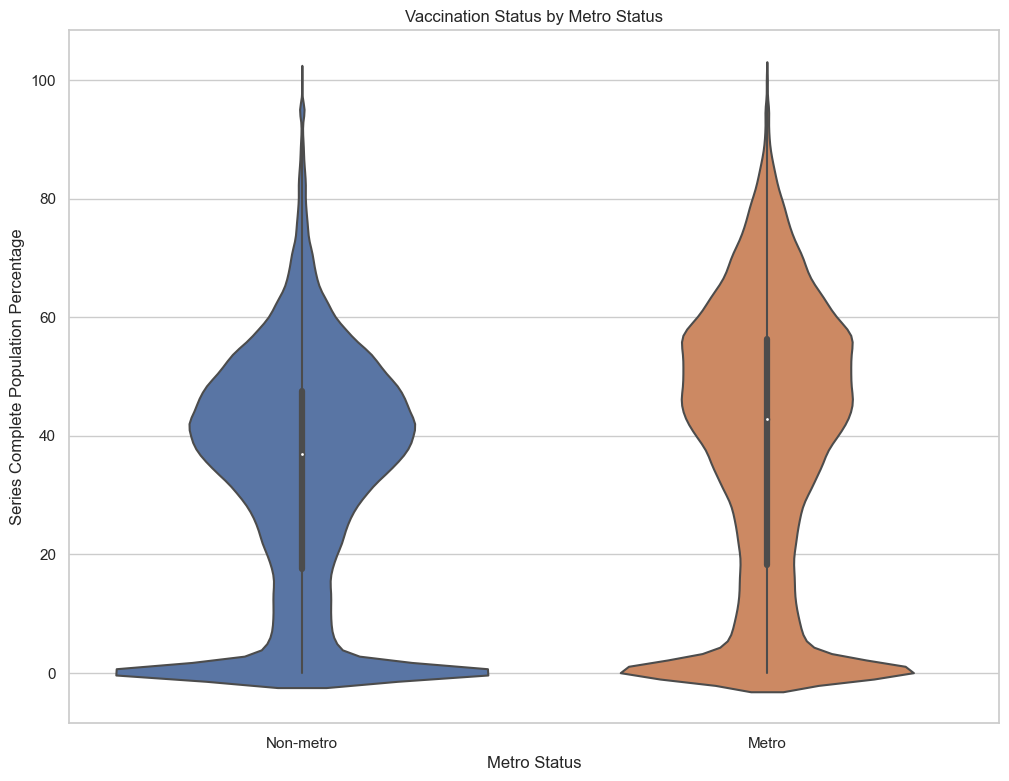

In [51]:
sns.violinplot(x='Metro_status', y='Series_Complete_Pop_Pct', data=temp_df, errorbar=None)
plt.title('Vaccination Status by Metro Status')
plt.xlabel('Metro Status')
plt.ylabel('Series Complete Population Percentage')
plt.show() 

In [52]:
numeric_columns = covid_numerical.columns.tolist()  # Get the list of column names containing numeric values
grouped_covid = covid.groupby(['FIPS','Recip_County'], as_index=False)[numeric_columns].mean()
# Resetting the index of the resulting DataFrame
grouped_covid.reset_index(inplace=True)

In [53]:
#booster_age_groups = ['5Plus', '12Plus', '18Plus', '50Plus', '65Plus']
#for age_group in booster_age_groups:
    #top_counties = grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10)
    #sns.barplot(x=f'Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=top_counties)
    #plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
    #plt.xlabel('County')
    #plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
    #plt.xticks(rotation=45, ha='right')
    #plt.show()
    
    

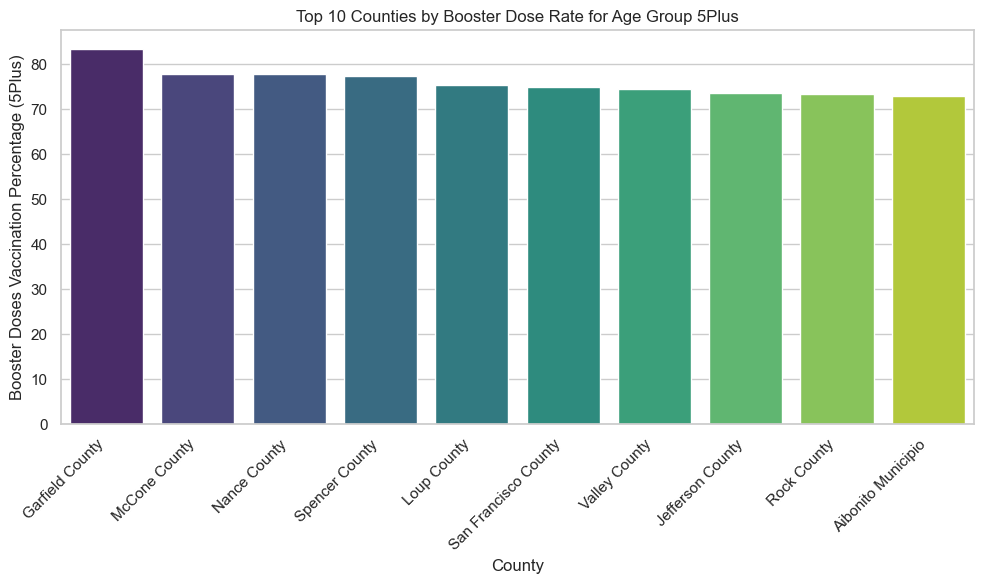

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

age_group = '5Plus'  

top_counties = grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10)

custom_colors = sns.color_palette('viridis', n_colors=len(top_counties))

plt.figure(figsize=(10, 6))
sns.barplot(x='Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=top_counties, palette=custom_colors)
plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
plt.xlabel('County')
plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

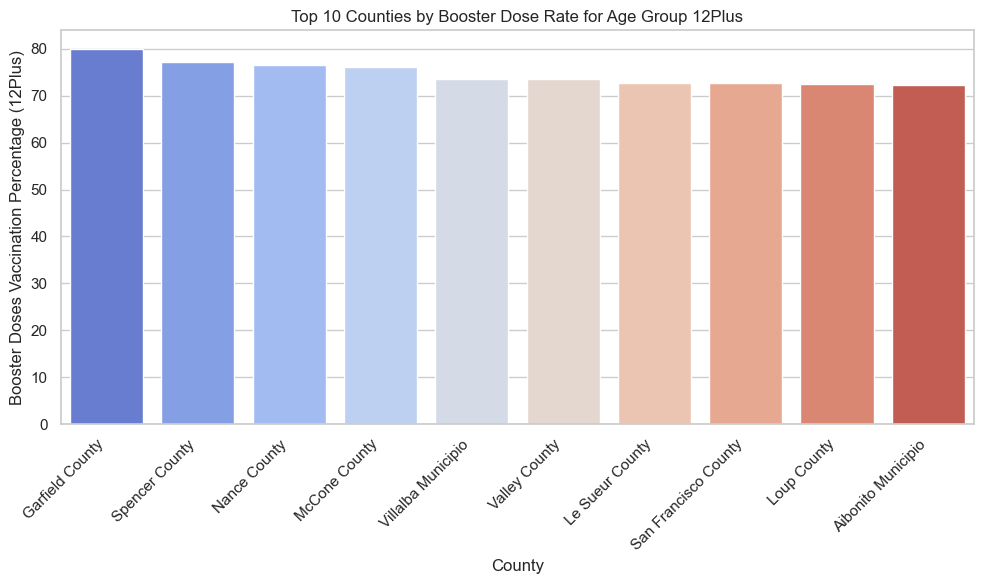

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

age_group = '12Plus'  

top_counties = grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10)

custom_colors = sns.color_palette('coolwarm', n_colors=len(top_counties))

plt.figure(figsize=(10, 6))
sns.barplot(x='Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=top_counties, palette=custom_colors)
plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
plt.xlabel('County')
plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

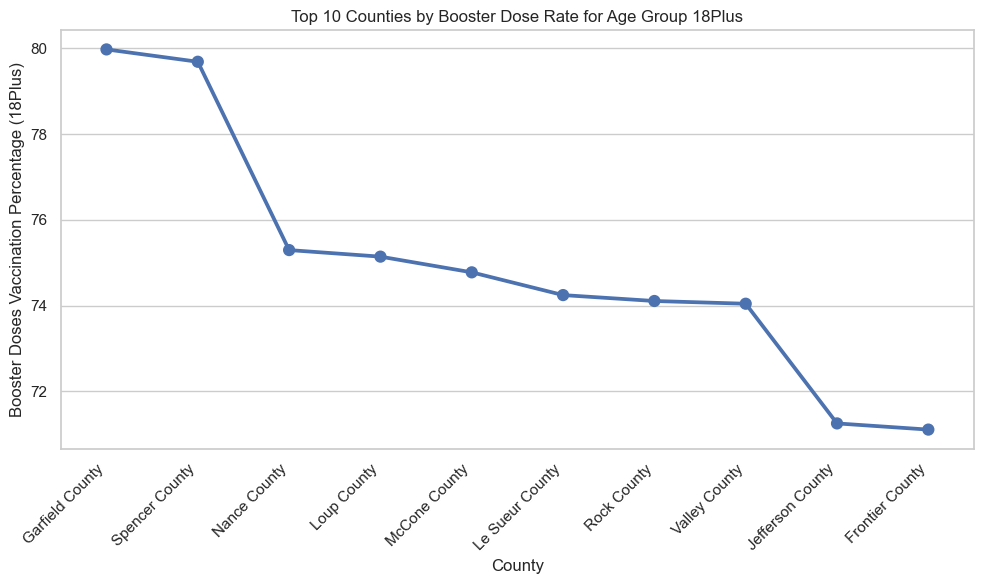

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

age_group = '18Plus'  

top_counties = grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.pointplot(x='Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=top_counties)
plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
plt.xlabel('County')
plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

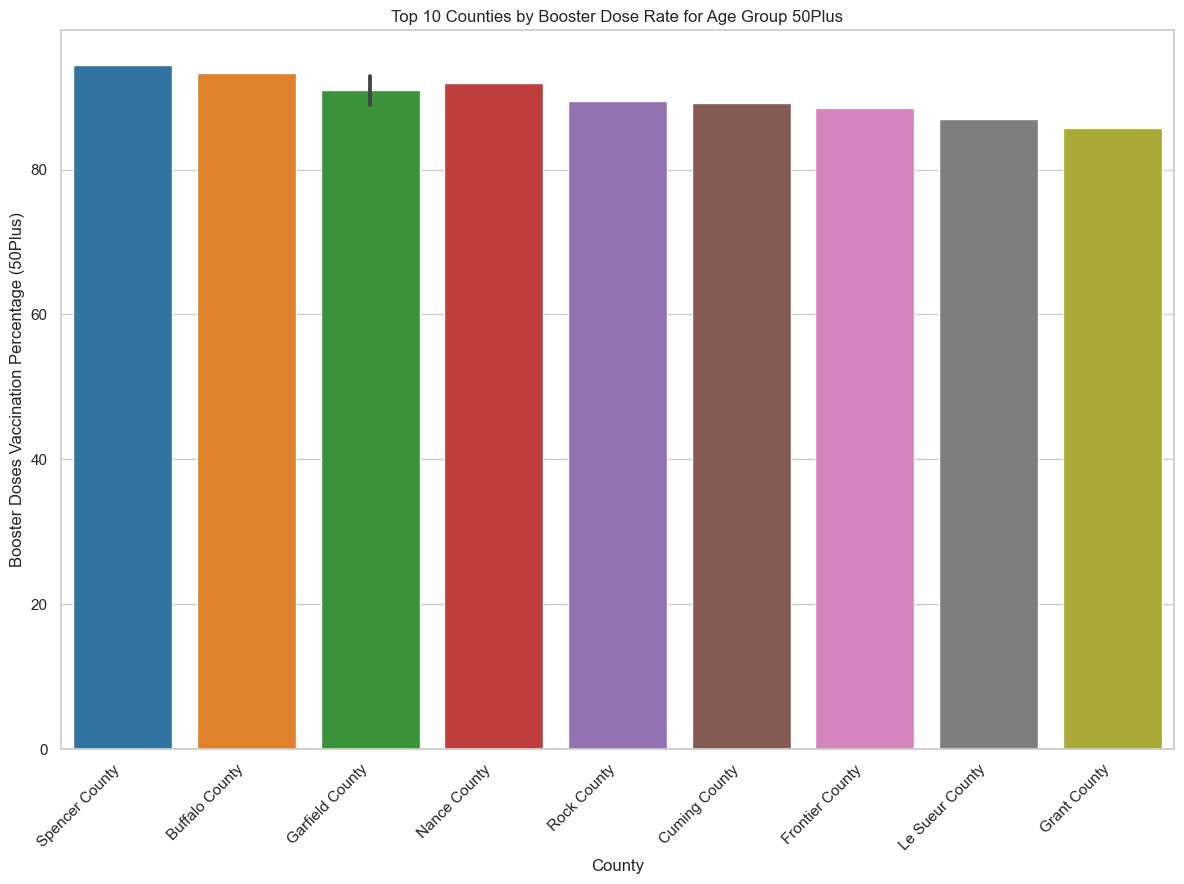

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

age_group = '50Plus'  

top_counties = grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10)

custom_colors = custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

#plt.figure(figsize=(10, 6))
sns.barplot(x='Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=top_counties, palette=custom_colors)
plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
plt.xlabel('County')
plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

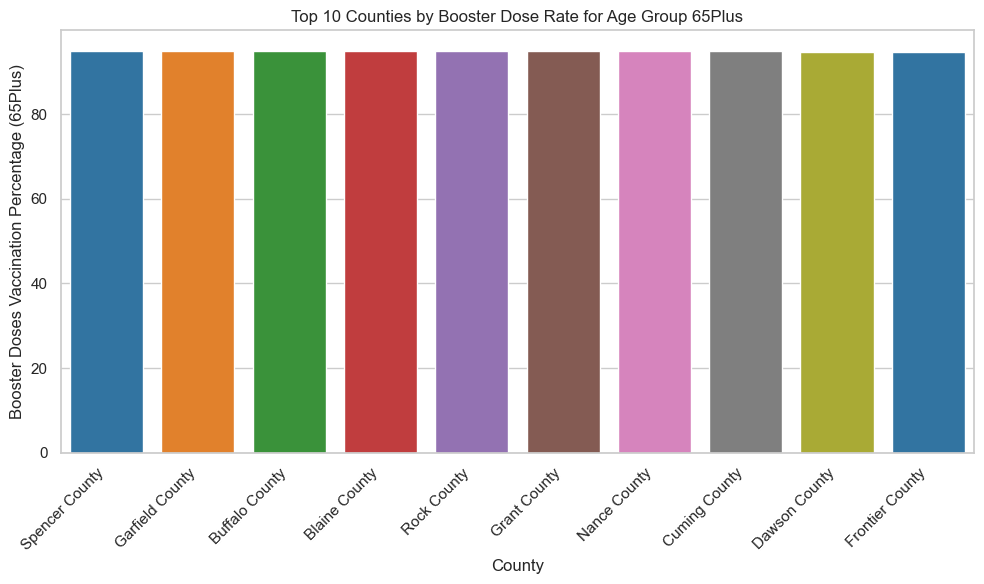

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

age_group = '65Plus'  

top_counties = grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10)

custom_colors = custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'] 

plt.figure(figsize=(10, 6))
sns.barplot(x='Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=top_counties, palette=custom_colors)
plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
plt.xlabel('County')
plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

#Hesitency Dataset

In [59]:
Vac_Hesitancy = pd.read_csv('Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates_20231113.csv')

In [60]:
Vac_Hesitancy.head()

FIPS Code                 County Name    State  Estimated hesitant  Estimated hesitant or unsure  Estimated strongly hesitant  Social Vulnerability Index (SVI)             SVI Category  CVAC level of concern for vaccination rollout CVAC Level Of Concern  Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0       1123  Tallapoosa County, Alabama  ALABAMA                0.18                          0.24                         0.14                              0.89  Very High Vulnerability                                           0.64          High Concern                                               0.30                             0.02                                               0.00    
1       1121   Talladega County, Alabama  ALABAMA                0.18                          0.23                         0.14                              0.87  Very High Vulnerability                                           0.84     Very High Concern                                               0.27                             0.02                                               0.00    
2       1131      Wilcox County, Alabama  ALABAMA                0.17                          0.24                         0.13                              0.93  Very High Vulnerability                                           0.94     Very High Concern                                               0.39                             0.01                                               0.00    
3       1129  Washington County, Alabama  ALABAMA                0.17                          0.24                         0.13                              0.73       High Vulnerability                                           0.82     Very High Concern                                               0.31                             0.01                                               0.07    
4       1119      Sumter County, Alabama  ALABAMA                0.18                          0.25                         0.14                              0.96  Very High Vulnerability                                           0.96     Very High Concern                                               0.36                             0.01                                               0.00    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  Percent non-Hispanic Native Hawaiian/Pacific Islander  Percent non-Hispanic White            Geographical Point State Code                                    County Boundary                                     State Boundary  
0                        0.00                        0.27                                               0.00                            0.69  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-85.841259 33.104456, -85.8409...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
1                        0.01                        0.32                                               0.00                            0.63  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-86.303069 33.46316, -86.30306...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
2                        0.00                        0.69                                               0.00                            0.27  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-87.52534299999999 32.132773, ...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
3                        0.00                        0.24                                               0.00                            0.65  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-88.45317899999999 31.505388, ...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
4                        0.02                        0.72                                               0.00                            0.25  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON 

In [61]:
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].astype('object')
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].apply(lambda x: str(x) if isinstance(x, int) else x)
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].astype('str')


def add_zero_prefix(value):
    if len(value) == 4:
        return '0' + value
    else:
        return value

# Apply the function to the 'Column1'
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].apply(add_zero_prefix)

print("\nDataFrame with '0' added to values of length 4:")
# print(covid.info())


DataFrame with '0' added to values of length 4:


In [62]:
Vac_Hesitancy.head()

FIPS Code                 County Name    State  Estimated hesitant  Estimated hesitant or unsure  Estimated strongly hesitant  Social Vulnerability Index (SVI)             SVI Category  CVAC level of concern for vaccination rollout CVAC Level Of Concern  Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0     01123  Tallapoosa County, Alabama  ALABAMA                0.18                          0.24                         0.14                              0.89  Very High Vulnerability                                           0.64          High Concern                                               0.30                             0.02                                               0.00    
1     01121   Talladega County, Alabama  ALABAMA                0.18                          0.23                         0.14                              0.87  Very High Vulnerability                                           0.84     Very High Concern                                               0.27                             0.02                                               0.00    
2     01131      Wilcox County, Alabama  ALABAMA                0.17                          0.24                         0.13                              0.93  Very High Vulnerability                                           0.94     Very High Concern                                               0.39                             0.01                                               0.00    
3     01129  Washington County, Alabama  ALABAMA                0.17                          0.24                         0.13                              0.73       High Vulnerability                                           0.82     Very High Concern                                               0.31                             0.01                                               0.07    
4     01119      Sumter County, Alabama  ALABAMA                0.18                          0.25                         0.14                              0.96  Very High Vulnerability                                           0.96     Very High Concern                                               0.36                             0.01                                               0.00    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  Percent non-Hispanic Native Hawaiian/Pacific Islander  Percent non-Hispanic White            Geographical Point State Code                                    County Boundary                                     State Boundary  
0                        0.00                        0.27                                               0.00                            0.69  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-85.841259 33.104456, -85.8409...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
1                        0.01                        0.32                                               0.00                            0.63  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-86.303069 33.46316, -86.30306...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
2                        0.00                        0.69                                               0.00                            0.27  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-87.52534299999999 32.132773, ...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
3                        0.00                        0.24                                               0.00                            0.65  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-88.45317899999999 31.505388, ...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...  
4                        0.02                        0.72                                               0.00                            0.25  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-8

In [63]:
merged_data = pd.merge(Vac_Hesitancy, grouped_covid, left_on='FIPS Code',right_on='FIPS', how='inner')

In [64]:
merged_data.head(2)


FIPS Code                 County Name    State  Estimated hesitant  Estimated hesitant or unsure  Estimated strongly hesitant  Social Vulnerability Index (SVI)             SVI Category  CVAC level of concern for vaccination rollout CVAC Level Of Concern  Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0     01123  Tallapoosa County, Alabama  ALABAMA                0.18                          0.24                         0.14                              0.89  Very High Vulnerability                                           0.64          High Concern                                               0.30                             0.02                                               0.00    
1     01121   Talladega County, Alabama  ALABAMA                0.18                          0.23                         0.14                              0.87  Very High Vulnerability                                           0.84     Very High Concern                                               0.27                             0.02                                               0.00    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  Percent non-Hispanic Native Hawaiian/Pacific Islander  Percent non-Hispanic White            Geographical Point State Code                                    County Boundary                                     State Boundary  index   FIPS       Recip_County                          Date  MMWR_week  Completeness_pct  \
0                        0.00                        0.27                                               0.00                            0.69  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-85.841259 33.104456, -85.8409...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...     61  01123  Tallapoosa County 2021-10-18 17:44:20.869565184      23.51             88.64   
1                        0.01                        0.32                                               0.00                            0.63  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-86.303069 33.46316, -86.30306...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...     60  01121   Talladega County 2021-10-18 17:44:20.869565184      23.51             86.27   

   Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  Series_Complete_Yes  Series_Complete_Pop_Pct  \
0                  12787.18                       31.68                        18343.09                                  47.99                         13161.00                                   32.48                         12713.80                                   34.07                          5226.16                                   50.08             10879.72                    26.95   
1                  24483.63                       30.61                        35350.35                                  46.69                         24326.66                                   35.12                         23407.53                                   37.00                          8380.86                                   56.75             19962.39                    24.96   

   Series_Complete_5Plus  Series_Complete_5PlusPop_Pct  Series_Complete_5to17  Series_Complete_5to17Pop_Pct  Series_Complete_12Plus  Series_Complete_12PlusPop_Pct  Series_Complete_18Plus  Series_Complete_18PlusPop_Pct  Series_Complete_65Plus  Series_Complete_65PlusPop_Pct  Booster_Doses  Booster_Doses_Vax_Pct  Booster_Doses_5Plus  Booster_Doses_5Plus_Vax_Pct  Booster_Doses_12Plus  \
0               15477.88                         40.50                 768.14                         12.6

In [65]:
ethnicity_columns = [
    'Percent Hispanic',
    'Percent non-Hispanic American Indian/Alaska Native',
    'Percent non-Hispanic Asian',
    'Percent non-Hispanic Black',
    'Percent non-Hispanic Native Hawaiian/Pacific Islander',
    'Percent non-Hispanic White'
]
merged_data['Dominant Ethnicity'] = merged_data[ethnicity_columns].idxmax(axis=1)

**Count of Counties by Dominant Ethnicity**

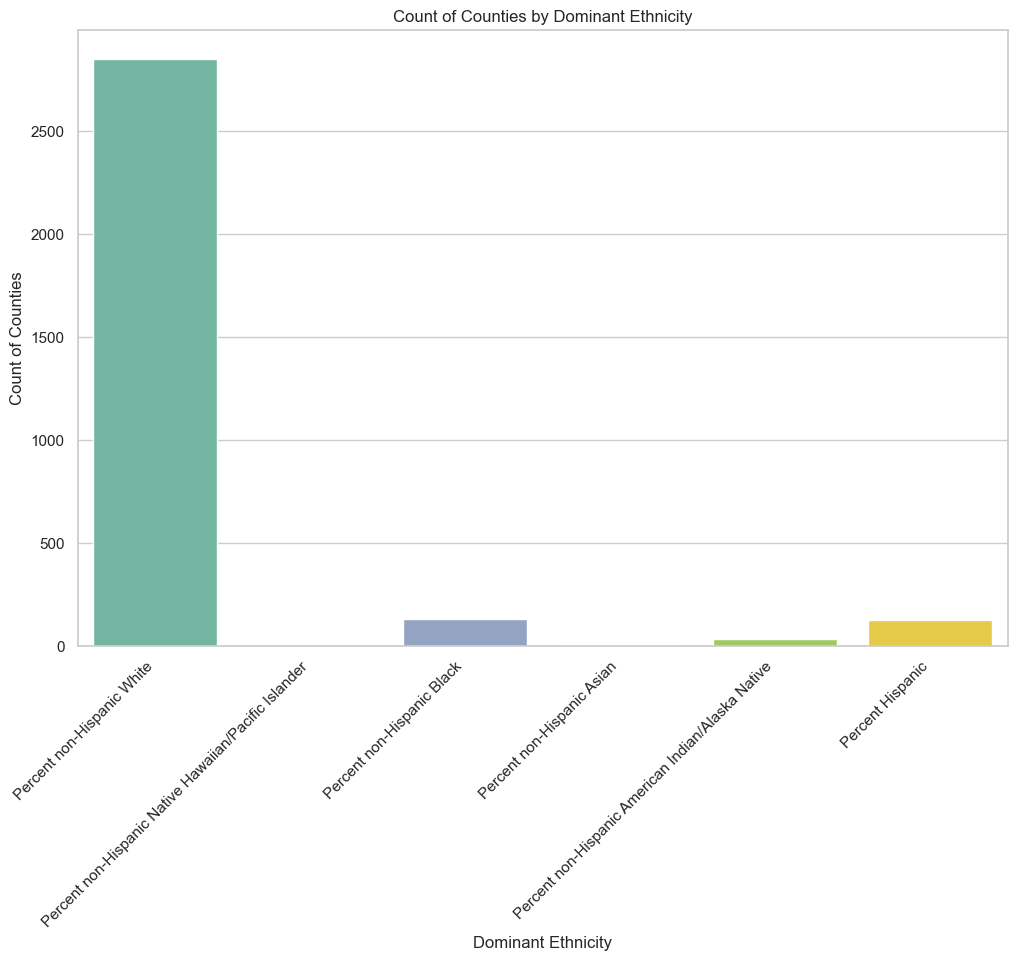

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values of 'Dominant Ethnicity' column and sort them in ascending order
sorted_ethnicities = merged_data['Dominant Ethnicity'].value_counts().index.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.countplot(x='Dominant Ethnicity', data=merged_data, order=sorted_ethnicities, palette='Set2')
plt.title('Count of Counties by Dominant Ethnicity')
plt.xlabel('Dominant Ethnicity')
plt.ylabel('Count of Counties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


**Series Complete population percentage**

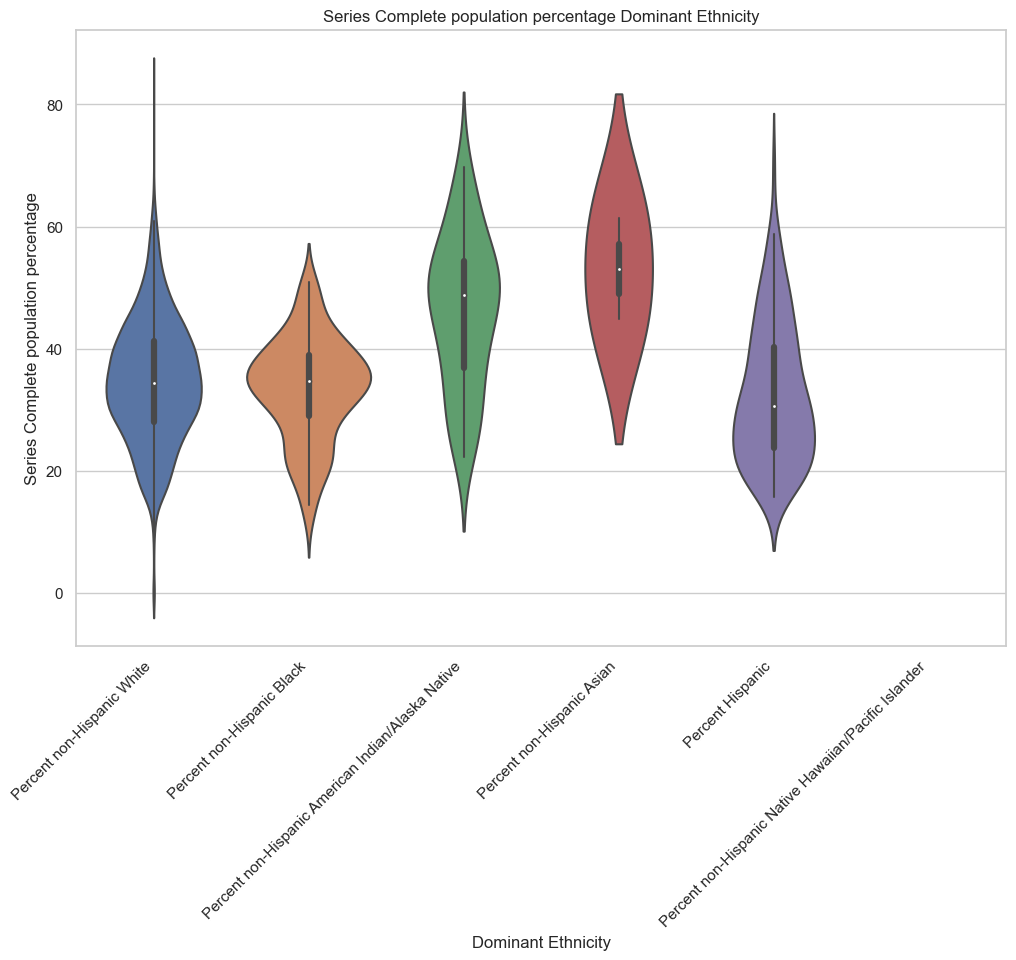

In [67]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Dominant Ethnicity',y='Series_Complete_Pop_Pct', data=merged_data)
plt.title('Series Complete population percentage Dominant Ethnicity')
plt.xlabel('Dominant Ethnicity')
plt.ylabel('Series Complete population percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**CVAC level of concern for vaccination rollout**

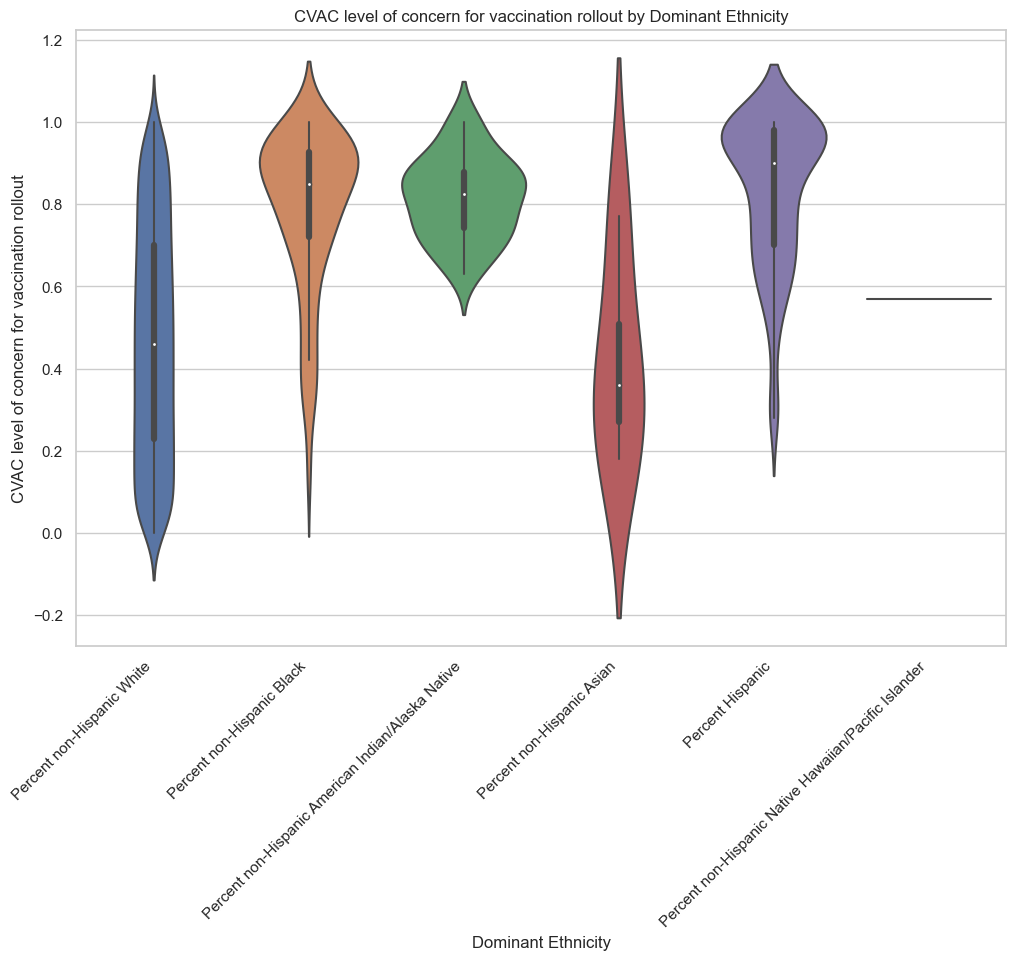

In [68]:
plt.figure(figsize=(12, 8))
sns.violinplot(y='CVAC level of concern for vaccination rollout',x='Dominant Ethnicity', data=merged_data)
plt.title('CVAC level of concern for vaccination rollout by Dominant Ethnicity')
plt.xlabel('Dominant Ethnicity')
plt.ylabel('CVAC level of concern for vaccination rollout')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#Politics Dataset

In [69]:
politics=pd.read_csv('politics.csv')

In [70]:
filtered_df = politics[politics['year'] > 2019]
idxmax_votes = filtered_df.groupby('FIPS')['candidatevotes'].idxmax()
final = filtered_df.loc[idxmax_votes]

In [71]:
final['FIPS']=final['FIPS'].astype(int)

In [72]:
final['FIPS'] = final['FIPS'].astype('object')
final['FIPS'] = final['FIPS'].apply(lambda x: str(x) if isinstance(x, int) else x)
final['FIPS'] = final['FIPS'].astype('str')


def add_zero_prefix(value):
    if len(value) == 4:
        return '0' + value
    else:
        return value

# Apply the function to the 'Column1'
final['FIPS'] = final['FIPS'].apply(add_zero_prefix)

print("\nDataFrame with '0' added to values of length 4:")


DataFrame with '0' added to values of length 4:


In [73]:
Final_Merged_data = pd.merge(merged_data, final, left_on='FIPS Code',right_on='FIPS', how='inner')

In [74]:
Final_Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Columns: 108 entries, FIPS Code to totalvotes
dtypes: datetime64[ns](1), float64(88), int64(2), object(17)
memory usage: 2.6+ MB


In [75]:
Final_Merged_data.drop(columns=['FIPS_y','candidatevotes','totalvotes','state_po','State_y','year'],axis=0,inplace=True)

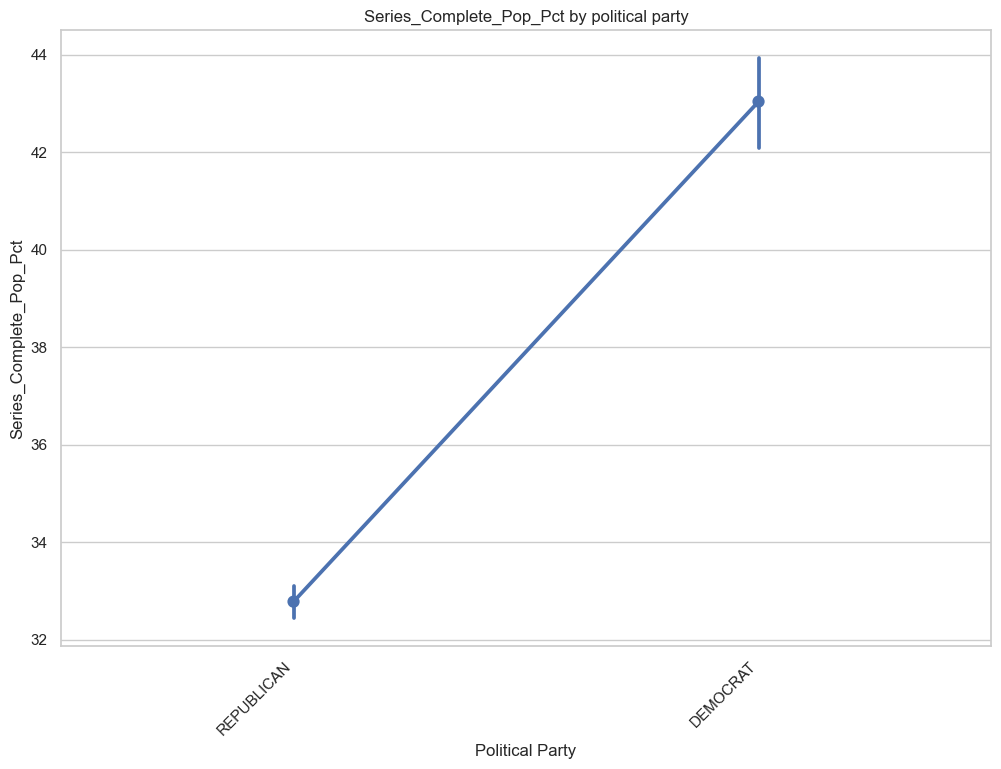

In [76]:
plt.figure(figsize=(12, 8))
sns.pointplot(y='Series_Complete_Pop_Pct',x='party', data=Final_Merged_data)
plt.title('Series_Complete_Pop_Pct by political party')
plt.xlabel('Political Party')
plt.ylabel('Series_Complete_Pop_Pct')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


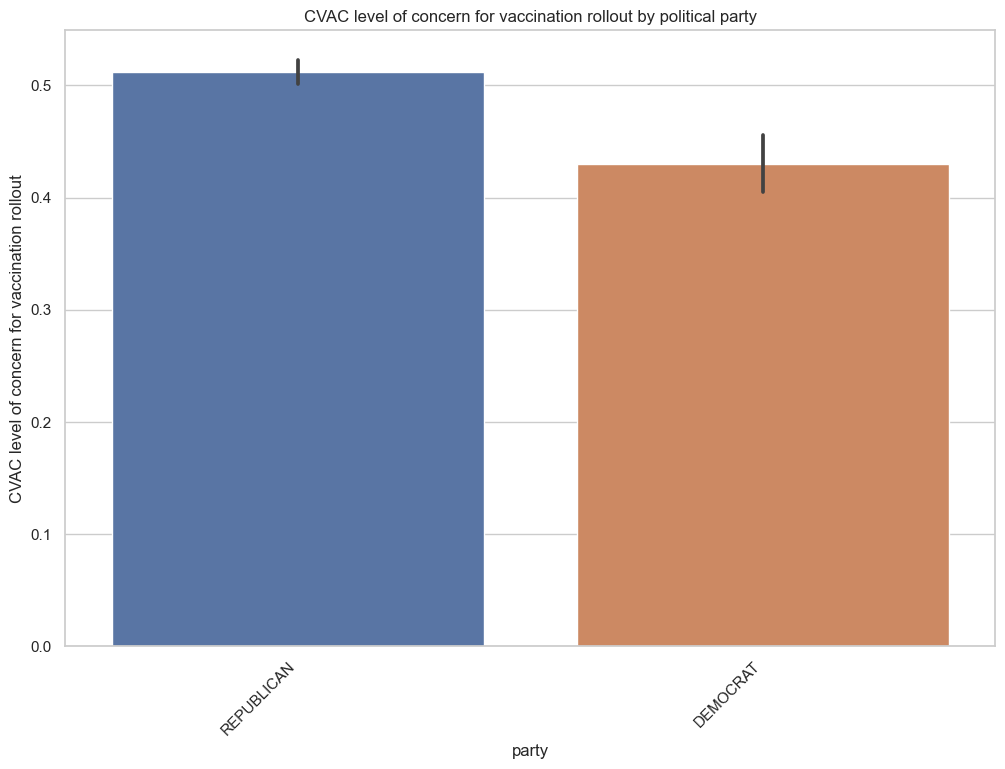

In [77]:
#1
plt.figure(figsize=(12, 8))
sns.barplot(y='CVAC level of concern for vaccination rollout',x='party', data=Final_Merged_data)
plt.title('CVAC level of concern for vaccination rollout by political party')
plt.xlabel('party')
plt.ylabel('CVAC level of concern for vaccination rollout')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

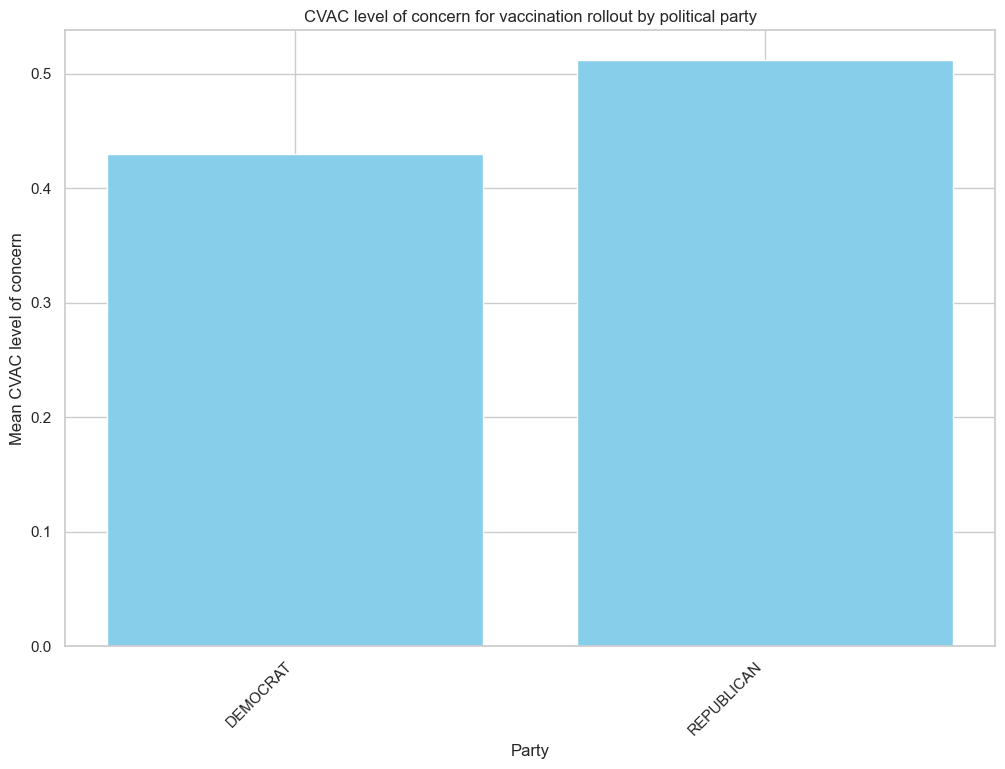

In [78]:
#2
import matplotlib.pyplot as plt

# Group the data by political party and calculate the mean CVAC level of concern for vaccination rollout
party_means = Final_Merged_data.groupby('party')['CVAC level of concern for vaccination rollout'].mean()

# Extract party names and mean CVAC levels
parties = party_means.index
mean_concern_levels = party_means.values

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(parties, mean_concern_levels, color='skyblue')

# Add title and labels
plt.title('CVAC level of concern for vaccination rollout by political party')
plt.xlabel('Party')
plt.ylabel('Mean CVAC level of concern')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

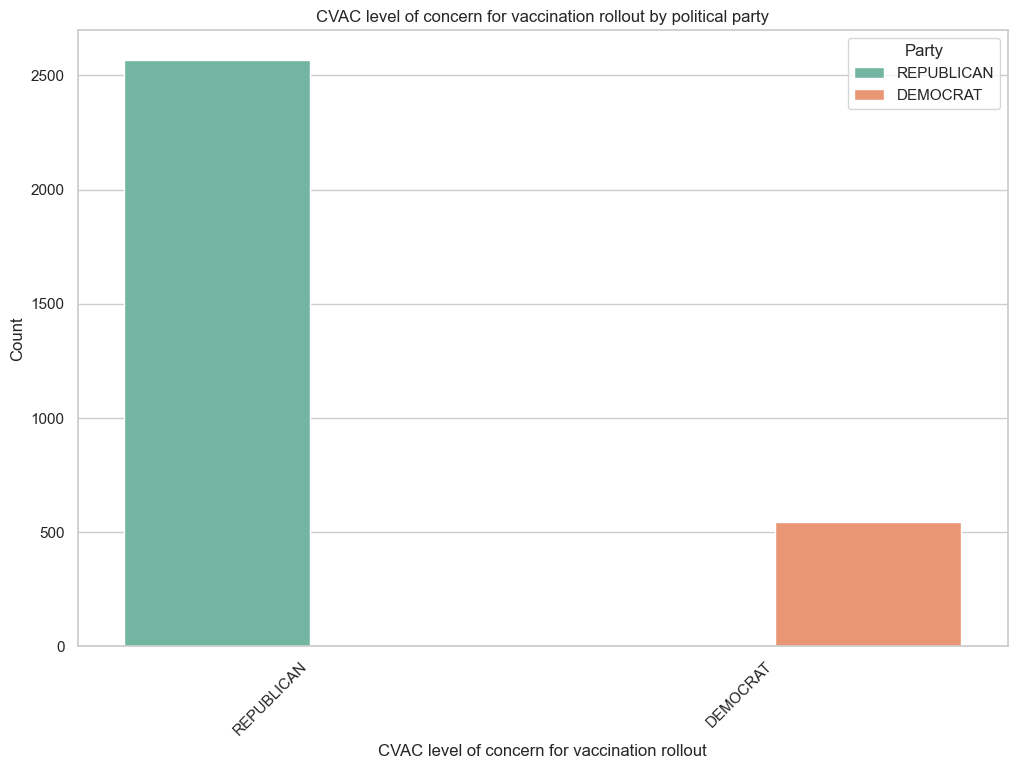

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='party',hue='party', data=Final_Merged_data, palette='Set2')
plt.title('CVAC level of concern for vaccination rollout by political party')
plt.xlabel('CVAC level of concern for vaccination rollout')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Party', loc='upper right')
plt.show()


In [80]:
Final_Merged_data.shape

(3113, 102)

In [81]:
Final_Merged_data[Final_Merged_data['County']=='TETON']

FIPS Code            County Name  State_x  Estimated hesitant  Estimated hesitant or unsure  Estimated strongly hesitant  Social Vulnerability Index (SVI)            SVI Category  CVAC level of concern for vaccination rollout CVAC Level Of Concern  Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
258      56039  Teton County, Wyoming  WYOMING                0.20                          0.27                         0.15                              0.11  Very Low Vulnerability                                           0.44      Moderate Concern                                               0.79                             0.15                                               0.00    
546      16081    Teton County, Idaho    IDAHO                0.20                          0.27                         0.13                              0.13  Very Low Vulnerability                                           0.24           Low Concern                                               0.56                             0.17                                               0.01    
1884     30099  Teton County, Montana  MONTANA                0.27                          0.32                         0.18                              0.30       Low Vulnerability                                           0.18      Very Low Concern                                               0.38                             0.02                                               0.01    

      Percent non-Hispanic Asian  Percent non-Hispanic Black  Percent non-Hispanic Native Hawaiian/Pacific Islander  Percent non-Hispanic White             Geographical Point State Code                                    County Boundary                                     State Boundary  index FIPS_x  Recip_County                          Date  MMWR_week  Completeness_pct  \
258                         0.01                        0.01                                               0.00                            0.81   POINT (-107.55145 42.999627)         WY  MULTIPOLYGON (((-111.049091 44.132368, -111.04...  MULTIPOLYGON (((-111.044893 43.315719, -111.04...   3138  56039  Teton County 2021-10-18 17:44:20.869565184      23.51             92.91   
546                         0.00                        0.00                                               0.00                            0.81  POINT (-114.659366 44.389073)         ID  MULTIPOLYGON (((-111.400806 43.854665, -111.40...  MULTIPOLYGON (((-116.899711 44.840609, -116.89...    591  16081  Teton County 2021-10-18 17:44:20.869565184      23.51             92.57   
1884                        0.00                        0.01                                               0.00                            0.94  POINT (-109.645127 47.033521)         MT  MULTIPOLYGON (((-112.365028 47.547821, -112.37...  MULTIPOLYGON (((-115.629488 47.47961, -115.634...   1647  30099  Teton County 2021-10-18 17:44:20.869565184      23.51             88.53   

      Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  Series_Complete_Yes  Series_Complete_Pop_Pct  \
258                   18545.65                       74.57                        24883.58                                  95.02                         18118.61                                   78.84                         17169.56                                   79.65                          3340.07                                   82.62             15812.37                    67.31   
546                    6468.71                       53.28                         9249.46                                  80.

In [82]:
Final_Merged_data.head(5)

FIPS Code                 County Name  State_x  Estimated hesitant  Estimated hesitant or unsure  Estimated strongly hesitant  Social Vulnerability Index (SVI)             SVI Category  CVAC level of concern for vaccination rollout CVAC Level Of Concern  Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0     01123  Tallapoosa County, Alabama  ALABAMA                0.18                          0.24                         0.14                              0.89  Very High Vulnerability                                           0.64          High Concern                                               0.30                             0.02                                               0.00    
1     01121   Talladega County, Alabama  ALABAMA                0.18                          0.23                         0.14                              0.87  Very High Vulnerability                                           0.84     Very High Concern                                               0.27                             0.02                                               0.00    
2     01131      Wilcox County, Alabama  ALABAMA                0.17                          0.24                         0.13                              0.93  Very High Vulnerability                                           0.94     Very High Concern                                               0.39                             0.01                                               0.00    
3     01129  Washington County, Alabama  ALABAMA                0.17                          0.24                         0.13                              0.73       High Vulnerability                                           0.82     Very High Concern                                               0.31                             0.01                                               0.07    
4     01119      Sumter County, Alabama  ALABAMA                0.18                          0.25                         0.14                              0.96  Very High Vulnerability                                           0.96     Very High Concern                                               0.36                             0.01                                               0.00    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  Percent non-Hispanic Native Hawaiian/Pacific Islander  Percent non-Hispanic White            Geographical Point State Code                                    County Boundary                                     State Boundary  index FIPS_x       Recip_County                          Date  MMWR_week  Completeness_pct  \
0                        0.00                        0.27                                               0.00                            0.69  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-85.841259 33.104456, -85.8409...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...     61  01123  Tallapoosa County 2021-10-18 17:44:20.869565184      23.51             88.64   
1                        0.01                        0.32                                               0.00                            0.63  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-86.303069 33.46316, -86.30306...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...     60  01121   Talladega County 2021-10-18 17:44:20.869565184      23.51             86.27   
2                        0.00                        0.69                                               0.00                            0.27  POINT (-86.844516 32.756889)         AL  MULTIPOLYGON (((-87.52534299999999 32.132773, ...  MULTIPOLYGON (((-88.139988 34.581703, -88.1352...     65  01131      Wilcox County 2021-10-18 17:44:20.869565184      23.51             83.47   
3                        0.00                        0.24                                               0.00       

In [83]:
map_data=Final_Merged_data[['FIPS Code','Recip_County','Series_Complete_Pop_Pct','party','Social Vulnerability Index (SVI)']]

In [84]:
map_data

FIPS Code        Recip_County  Series_Complete_Pop_Pct       party  Social Vulnerability Index (SVI)
0        01123   Tallapoosa County                    26.95  REPUBLICAN                              0.89
1        01121    Talladega County                    24.96  REPUBLICAN                              0.87
2        01131       Wilcox County                    35.80    DEMOCRAT                              0.93
3        01129   Washington County                    31.06  REPUBLICAN                              0.73
4        01119       Sumter County                    35.02    DEMOCRAT                              0.96
...        ...                 ...                      ...         ...                               ...
3108     55079    Milwaukee County                    45.70    DEMOCRAT                              0.81
3109     55121  Trempealeau County                    48.21  REPUBLICAN                              0.28
3110     56001       Albany County                    40.04    DEMOCRAT                              0.25
3111     55067     Langlade County                    39.82  REPUBLICAN                              0.35
3112     55099        Price County                    45.53  REPUBLICAN                              0.16

[3113 rows x 5 columns]

In [85]:
map_data = map_data.fillna(0)

In [86]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
import pandas as pd
import json

# Load GeoJSON file representing USA county boundaries
geojson_file = 'tl_2019_us_county.geojson'  # Replace with your GeoJSON file
with open(geojson_file) as f:
    geo_data = json.load(f)

# Create a base map centered at the USA's approximate center using Folium
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered at USA coordinates

# Merge DataFrame information into GeoJSON properties based on FIPS codes
for feature in geo_data['features']:
    fips_code = feature['properties']['GEOID']
    if fips_code in map_data['FIPS Code'].values:
        Series_Complete_Pop_Pct = map_data.loc[map_data['FIPS Code'] == fips_code, 'Series_Complete_Pop_Pct'].values[0]
        Recip_County = map_data.loc[map_data['FIPS Code'] == fips_code, 'Recip_County'].values[0]
        feature['properties']['Series_Complete_Pop_Pct'] = Series_Complete_Pop_Pct
        feature['properties']['Recip_County'] = Recip_County
    else:
        feature['properties']['Series_Complete_Pop_Pct'] = None
        feature['properties']['Recip_County'] = None

# Add GeoJSON boundaries to the map and visualize population percentages
folium.GeoJson(
    geo_data,
    style_function=lambda feature: {
        'fillColor': 'green',  # Change to green color
        'fillOpacity': 0.7,
        'weight': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=['GEOID', 'Recip_County', 'Series_Complete_Pop_Pct'], aliases=['FIPS', 'County', 'Series_complete %']),
    highlight_function=lambda x: {'weight': 3, 'fillOpacity': 0.9}
).add_to(usa_map)

# Display the map
usa_map
